<a href="https://colab.research.google.com/github/sftSalman/pytorch/blob/main/new_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy 
from PIL import Image
from scipy import ndimage
%matplotlib inline 

In [2]:
#@title download datasets
import urllib.request
train = 'https://github.com/csaybar/DLcoursera/raw/master/Neural%20Networks%20and%20Deep%20Learning/week2/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/train_catvnoncat.h5'
test = 'https://github.com/csaybar/DLcoursera/raw/master/Neural%20Networks%20and%20Deep%20Learning/week2/Logistic%20Regression%20as%20a%20Neural%20Network/datasets/test_catvnoncat.h5'
urllib.request.urlretrieve(train,'train_catvnoncat.h5')
urllib.request.urlretrieve(test,'test_catvnoncat.h5')

('test_catvnoncat.h5', <http.client.HTTPMessage at 0x7f983ac3a250>)

In [3]:
#@title lr_utils
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [4]:
#load dataset 
train_set_x_orig,train_set_y,test_set_x_orig,test_set_y,classes = load_dataset()

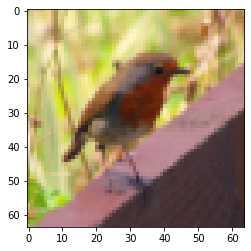

In [5]:
# explore Data 
plt.imshow(train_set_x_orig[10])

In [6]:
#print(train_set_y[10])

In [7]:
print(train_set_y.shape)

(1, 209)


In [8]:
print(train_set_y[:,10])

[0]


In [9]:
# shape of data 
m_train = train_set_x_orig.shape[0]
m_test  = train_set_y.shape[0]
num_px = train_set_x_orig.shape[1]

In [10]:
print(m_train,'\n', m_test, '\n',num_px)

209 
 1 
 64


In [11]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)


(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)


In [12]:
print(train_set_x_orig[1])

[[[196 192 190]
  [193 186 182]
  [188 179 174]
  ...
  [ 90 142 200]
  [ 90 142 201]
  [ 90 142 201]]

 [[230 229 229]
  [204 199 197]
  [193 186 181]
  ...
  [ 91 143 201]
  [ 91 143 201]
  [ 91 143 201]]

 [[232 225 224]
  [235 234 234]
  [208 205 202]
  ...
  [ 91 144 202]
  [ 91 144 202]
  [ 92 144 202]]

 ...

 [[ 18  17  15]
  [ 14  14  13]
  [ 29  29  32]
  ...
  [ 83  81  81]
  [ 84  82  83]
  [ 82  81  82]]

 [[ 22  20  18]
  [ 16  15  14]
  [ 25  24  24]
  ...
  [ 82  80  80]
  [ 83  81  82]
  [ 82  81  81]]

 [[ 45  43  39]
  [ 61  59  54]
  [ 81  78  74]
  ...
  [ 83  82  81]
  [ 84  82  82]
  [ 82  80  81]]]


In [13]:
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1)

In [14]:
print(train_set_y)

[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [15]:
train_set_x = train_x_flatten/255
test_set_x = test_x_flatten/255

In [16]:
def sigmoid(z):
  sig = 1/(1+np.exp(-z))
  return sig 

In [17]:
print(str(sigmoid(np.array([0,2]))))

[0.5        0.88079708]


In [18]:
print(str(np.array([0,2,3,4,5,6])))

[0 2 3 4 5 6]


In [19]:
def initilize_with_zero(d):
  w = np.zeros(shape=(d,1))
  b = 0
  return w,b 

In [20]:
d = 2 
w,b = initilize_with_zero(2)
print(str(w))
print(str(b))

[[0.]
 [0.]]
0


In [21]:
def propagate(w,b,X,Y):
  m = X.shape[1]
  A = sigmoid(np.dot(w.T,X+b))
  cost =(-1./m)*np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))
  dw = (1/m)*np.dot(X,(A-Y).T)
  db = (1/m)*np.sum((A-Y))

  grades={
      'dw': dw,
      'db': db
  }
  return grades,cost


In [22]:
x= np.array([1,2,3,4,5,6,7,8])
print(x.shape[0])

8


In [23]:
print(train_set_x.shape)

(209, 12288)


In [24]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.93406047]
 [2.18899374]]
db = 0.06593791286065272
cost = 5.873473260859346


In [25]:
def predict(w,b,X):
  m = X.shape[1]
  Y_predict = np.zeros(1,m)
  w = w.reshape(X.shape[0],1)
  A =sigmoid(np.dot(w.T,x)+b)
  for i in range (a.shape[1]):
    if A[0,i]>=0.5 :
      Y_predict[0,1]=1
    else:
      Y_predict[0,1]=0
  return Y_predict

In [26]:
a = np.zeros(shape=(3,2))

In [27]:
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [28]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

TypeError: ignored

In [30]:
print([0,2])

[0, 2]


In [31]:
a = [0,2]
if a >0.5:
  print('hi')

TypeError: ignored

In [32]:

for i in range(A.shape[1]):

    # Convert probabilities A[0,i] to actual predictions p[0,i]
    ### START CODE HERE ### (≈ 4 lines of code)
    if(B[i] > .5):
       Y_prediction[i] = 1
    else:
        Y_prediction[i] = 0

NameError: ignored

In [33]:
import numpy as np

a = np.matrix('0.1 0.82')
print(a)

a = np.where(a > 0.5, 1, 0)
print(a)

[[0.1  0.82]]
[[0 1]]


In [34]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1            
        else:
            Y_prediction[0, i] = 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [35]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [36]:
def model (X_train,Y_train,X_test,Y_test, num_iteration=2000,learning_rate=0.5, print_cost=False):
  w,b = initilize_with_zero(X_train.shape[0])
  paremeters,grades,cost
